# Regression Evaluation Metrics

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.DataFrame({
    'mesin': [1000, 2000, 3000, 4000, 5000], 
    'harga': [10, 25, 30, 65, 80]
})
df

,mesin,harga
0,1000,10
1,2000,25
2,3000,30
3,4000,65
4,5000,80


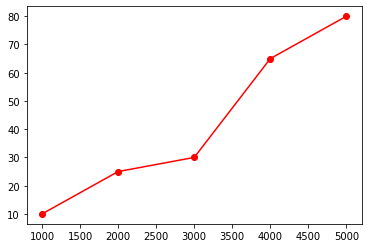

In [7]:
plt.plot(df['mesin'], df['harga'], 'r-o')
plt.show()

In [8]:
df.corr()

,mesin,harga
mesin,1.000000,0.971909
harga,0.971909,1.000000


In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression()

In [11]:
# .fit(x feature independent 2d, y target dependent 1d)
model.fit(df[['mesin']], df['harga'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
print(model.coef_[0])
# gradien = selisih y untuk |x1 - x2| = 1

print(model.intercept_) 
# titik potong plot best fit line dg sb y ~~~ titik y di mana x = 0

0.018
-11.999999999999993


In [13]:
df['y"'] = model.predict(df[['mesin']])
df

,mesin,harga,"y"""
0,1000,10,6.0
1,2000,25,24.0
2,3000,30,42.0
3,4000,65,60.0
4,5000,80,78.0


In [14]:
# mesin = 0cc maka harga = intercept
print(model.predict([[0]])[0])
print(model.intercept_)

# mesin = 1cc maka harga = ?
print(model.predict([[1]])[0])

# selisih harga mesin 1cc & 0cc = slope/gradien/kemiringan best fit line
# setiap naik 1cc, maka harga akan naik 0.018juta
print(model.predict([[1]])[0] - model.intercept_)
print(model.coef_[0])

# selisih harga mesin 1000cc dg harga mesin 999cc
print((model.predict([[1000]]) - model.predict([[999]]))[0])

-11.999999999999993
-11.999999999999993
-11.981999999999992
0.018000000000000682
0.018
0.018000000000000682


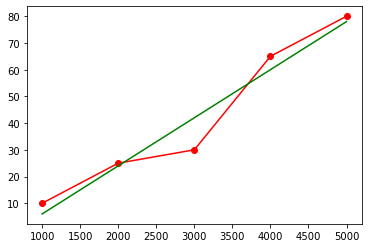

In [11]:
plt.plot(df['mesin'], df['harga'], 'r-o')
plt.plot(df['mesin'], df['y"'], 'g-')
plt.show()

In [12]:
# hitung residual/error/ralat/galat/toleransi
# |harga prediksi - harga aktual| = |y-y"|
df['|y-y"|'] = np.abs(df['y"'] - df['harga'])
df

,mesin,harga,"y""","|y-y""|"
0,1000,10,6.0,4.0
1,2000,25,24.0,1.0
2,3000,30,42.0,12.0
3,4000,65,60.0,5.0
4,5000,80,78.0,2.0


<hr>

### 1. Max Error

- Residual/error/selisih y aktual & y prediksi tertinggi 
- Makin kecil max error, maka model makin bagus
- $\displaystyle \textrm{max Error} = \textrm{max} (|y - \hat{y}|)$

In [13]:
maxErr = df['|y-y"|'].max()
maxErr

12.0

<hr>

### 2. Mean Absolute Error (MAE)

- Rata-rata nilai residual/error
- Makin kecil MAE, maka model makin bagus
- $\displaystyle \textrm{MAE} = \frac{1} {n} \sum (|y - \hat{y}|)$

In [14]:
n = df['mesin'].count()
MAE = round(df['|y-y"|'].sum()) / n
MAE

4.8

<hr>

### Sum Squared Error (SSE)

- __SSE__ = $\displaystyle \sum (y - \hat{y}) ^ 2$

In [15]:
df['|y-y"|^2'] = df['|y-y"|'] ** 2

In [16]:
sse = round(df['|y-y"|^2'].sum())
sse

190.0

<hr>

### 3. Mean Squared Error (MSE)

- __MSE__: rata-rata SSE = SSE / jumlah data 
- $\displaystyle \textrm{MSE} = \frac{1}{n} \sum (y-\hat{y})^2$

In [17]:
mse = sse / n
mse

38.0

<hr>

### 4. Root of MSE (RMSE)

- __RMSE__ = $\displaystyle \sqrt{\textrm{MSE}} = \sqrt{\frac{1}{n} \sum (y-\hat{y})^2}$
- Biasanya dijadikan sbg nilai ralat untuk setiap hasil prediksi

In [18]:
rmse = mse ** (0.5)
rmse

6.164414002968976

<hr>

### 5. Median Absolute Error (MedAE)

- __MedAE__ = $\displaystyle \textrm{median} (|y_1 - \hat{y_1}|, ... |y_n - \hat{y_n}|)$

In [19]:
# medae = np.median(df['|y-y"|'])
medae = df['|y-y"|'].median()
medae

4.0000000000000036

<hr>

### 6. Mean Squared Logarithmic Error (MSLE)

- __MSLE__ = $\displaystyle \frac {1} {n} \sum (\ln{(1 + y_i)} - \ln{(1 + \hat{y_i})}) ^ 2$
- Di mana $\ln{x} =  ^e\log{x}$, dengan $e$ adalah bilangan Euler

In [20]:
df['ln(1+y)'] = np.log(1 + df['harga'])
df['ln(1+y")'] = np.log(1 + df['y"'])
df['sle'] = (df['ln(1+y)'] - df['ln(1+y")']) ** 2

In [21]:
msle = df['sle'].sum() / n
msle

0.063945719502808

<hr>

### 7. Root of MSLE (RMSLE)

- __RMSLE__ = $\displaystyle \sqrt {\frac {1} {n} \sum (\ln{(1 + y_i)} - \ln{(1 + \hat{y_i})}) ^ 2}$

In [22]:
# rmsle = np.sqrt(msle)
# rmsle = np.power(msle, 0.5)
rmsle = msle ** 0.5
rmsle

0.2528749088043494

<hr>

### 8. Mean Absolute Percentage Error (MAPE)

- Absolute Percentage Error = $\displaystyle \left | \frac {y - \hat{y}} {y} \right |$

- __MAPE__ = $\displaystyle \frac{1}{n} \sum \left | \frac {y - \hat{y}} {y} \right |$

In [23]:
df['ape'] = np.abs((df['harga'] - df['y"']) / df['harga'])

In [24]:
mape = df['ape'].sum() / n
mape

0.18838461538461543

<hr>

### 9. Mean Squared Percentage Error

- __MSPE__ = $\displaystyle \frac{1}{n} \sum \left ( \frac{y-\hat{y}}{y} \right ) ^ 2$

In [25]:
df['ape^2'] = df['ape'] ** 2

In [26]:
mspe = df['ape^2'].sum() / n
mspe

0.06562843195266278

<hr>

### 10. $R^2$ Score

- $R^2$ score (coefficient of determination)

- $R^2 \textrm{score} = \displaystyle 1 - \frac {\sum(y-\hat{y})^2} {\sum(y-\bar{y})^2}$

- Di mana $\hat{y}$ = y prediksi dan $\bar{y}$ = y rata-rata

- Makin tinggi $R^2$ score, maka model makin bagus

- $\sqrt{R^2} = R $ correlation Pearson

In [27]:
df['(y-yRata)^2'] = (df['harga'] - df['harga'].mean()) ** 2
# |y-y"|^2

In [28]:
r2 = 1 - (df['|y-y"|^2'].sum() / df['(y-yRata)^2'].sum())
r2

0.9446064139941691

In [29]:
r2 ** 0.5

0.97190864488087

In [30]:
df[['mesin', 'harga']].corr()

,mesin,harga
mesin,1.000000,0.971909
harga,0.971909,1.000000


### 11. Evaluation Metrics using Sklearn

In [43]:
# Evaluation Metrics using Sklearn
from sklearn.metrics import (
    max_error,
    mean_absolute_error, 
    mean_squared_error, 
    mean_squared_log_error,
    median_absolute_error,
    r2_score
)

In [41]:
print('Max Error: {}'.format(max_error(df['harga'], df['y"'])))
print('MAE {}'.format(mean_absolute_error(df['harga'], df['y"'])))
print('MSE {}'.format(mean_squared_error(df['harga'], df['y"'])))
print('RMSE {}'.format(np.sqrt(mean_squared_error(df['harga'], df['y"']))))
print('MSLE {}'.format(mean_squared_log_error(df['harga'], df['y"'])))
print('RMSLE {}'.format(np.sqrt(mean_squared_log_error(df['harga'], df['y"']))))
print('MedAE {}'.format(median_absolute_error(df['harga'], df['y"'])))
print('R2 score {}'.format(r2_score(df['harga'], df['y"'])))

Max Error: 12.0
MAE 4.799999999999999
MSE 37.999999999999986
RMSE 6.164414002968975
MSLE 0.063945719502808
RMSLE 0.2528749088043494
MedAE 4.0000000000000036
R2 score 0.9446064139941691
